### 1. Локализация корней.

Локализовать действительные корни в уравнении:

$$
f(x)=20 x^{3} - 4 x^{2} - 5 x + 1 .
$$

(1.25, 0.047619047619047616)

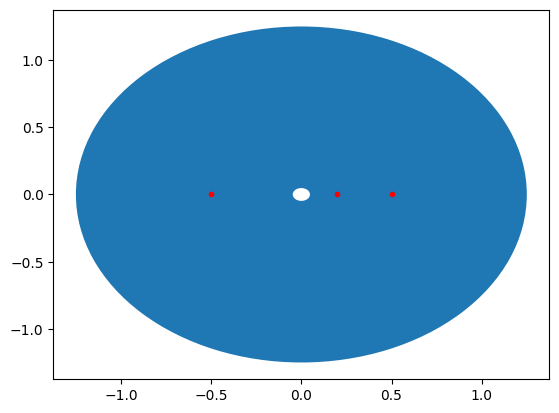

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

p = np.array([20, -4, -5, 1])
a = np.abs(p)
A = a[1:].max()
B = a[:-1].max()
outer = 1 + A / a[0]
inner = a[-1] / (a[-1] + B)

w = Wedge((0, 0), outer, 0, 360, width=outer - inner)
fig, ax = plt.subplots()
roots = np.roots(p)
ax.add_patch(w)
ax.plot(np.real(roots), np.imag(roots), '.', color='red')
outer, inner

In [13]:
def f(x):
    return 20 * x * x * x - 4 * x * x - 5 * x + 1

def ff(x):
    return 60 * x * x - 8 * x - 5

def fff(x):
    return 120 * x - 8

print(
      f(inner),   f(outer), '\n',
     ff(inner),  ff(outer), '\n',
    fff(inner), fff(outer), '\n',
)

print(
      f(-inner),   f(-outer), '\n',
     ff(-inner),  ff(-outer), '\n',
    fff(-inner), fff(-outer), '\n',
)

0.7549940611165101 27.5625 
 -5.244897959183674 78.75 
 -2.2857142857142865 142.0 

1.226865349314329 -38.0625 
 -4.482993197278912 98.75 
 -13.714285714285714 -158.0 



$$ f   (x) = 20 x^3 - 4 x^2 - 5x + 1 $$
$$ f'  (x) = 60 x^2 - 8 x - 5 $$
$$ f'' (x) = 120 x - 8 $$
$$ f(-\beta) < 0 \qquad f(-\alpha) > 0 \qquad f(\alpha) > 0 \qquad f(\beta) > 0 $$
$$ f'(-\beta) > 0 \qquad f'(-\alpha) < 0 \qquad f'(\alpha) < 0 \qquad f'(\beta) > 0 $$
$$ f''(-\beta) < 0 \qquad f''(-\alpha) < 0 \qquad f''(\alpha) < 0 \qquad f''(\beta) > 0 $$
$$ f'''(x) = 120 > 0 $$
По теореме Бюдана-Фурье один корень в $[-\beta, -\alpha]$ и два на $[\alpha, \beta]$, где $\alpha = \frac 1 {21} \qquad \beta = 1 + \frac 5 {20}$

### 2. Порядок сходимости итерационного метода.

Определить порядок сходимости итерационного метода при вычислении квадратного корня $x^* = \sqrt a$ :



$$
x_{n+1}=x_n - \frac{11x_n^4 - 4x_n^2 a + a^2}{16 x_n^5} (x_n^2 - a)
$$

$$ |x_{n + 1} - x^*| \le C |x_n - x*|^p $$
$$  |x_n - x^* - \frac {11x^4_n - 4x^2_n a + a^2} {16x^5_n} (x^2_n - a)|
\le |x_n - x^*| $$

$11x^2 - 2 * \sqrt 11 * 2 / \sqrt 11 * x + 4/11 + 7/11$
$(\sqrt 11 x + 2/11) $



### 3. Метод Ньютона и Гаусса-Ньютона.

Решение проблемы многомерной линейной регрессии нормальным уравнением очень похоже на обобщение метода Ньютона на многомерный случай. Но это не так.
Укажите, в чём различие между методами. В одномерном случае

$$
f(x) \approx f(x_0) + f^{\prime}(x_0)(x - x_0) = 0
$$

$$
x =  x_0 - \frac{f(x_0)}{f^{\prime}(x_0)}
$$

Обобщение метода Ньютона на многомерный случай выглядит так.

$$
F(\vec{β}) \approx F(\vec{β^{(0)}}) + \sum\limits_{i=1}^n{\frac{∂F(\vec{β^{(0)}})}{∂β_i}(β_i - β^0_i)} = 0
$$

$$
F(\vec{β^{(0)}}) + \nabla F(\vec{β^{(0)}})\vec{p}   = 0
$$

В случае поиска минимума функции F к нулю приравниваем частные производные F
$$
\frac{∂F(\vec{β})}{∂β_i} \approx \frac{∂F(\vec{β^{(0)}})}{∂β_i} + \sum\limits_{j=1}^n{\frac{∂^2F(\vec{β^{(0)}})}{∂β_i∂β_j}(β_i - β^0_i)} = 0
$$

Хинт: покажите, что

$$
2J^TJ  \neq   H_{ij}
$$

$H_{ij}$ - гессиан F.


### 4. Зри в корень

Отделить корни следующих уравнений, а затем уточнить один из них с помощью подходящего итерационно процесса (любых двух на ваш выбор двумя разными методами):


a) $(0.5)^x+1=(x-1)^2$,

__b)__ $(x-3) \cos x=1, \quad-2 \pi \leq \mathrm{x} \leq 2 \pi$,

c) $\operatorname{arctg}(x-1)+2 x=0$,

__d)__ $x^2-20 \sin x=0$

e) $2 \operatorname{tg} x-x / 2+1=0$,

__f)__ $2 \lg x-x / 2+1=0$,

g) $x^2-e^x / 5=0$

__h)__ $\ln x+(x-1)^3=0$,

i) $x 2^x=1$

__j)__ $(x+1)^{0.5}=1 / x$.

In [2]:
import numpy as np

methods = (
    (
        lambda x: 2 ** -x + 1 - np.square(x - 1),
        lambda x: -np.log(2) * 2 ** -x - 2 * (x - 1),
        lambda x: -np.log(2) ** 2 * 2 ** -x - 2,
        r'$(0.5)^x+1=(x-1)^2$',
    ),
    (
        lambda x: (x - 3) * np.cos(x) - 1,
        lambda x: np.cos(x) - (x - 3) * np.sin(x),
        lambda x: -2 * np.sin(x) - (x - 3) * np.cos(x),
        r'$(x-3) \cos x=1, \quad-2 \pi \leq \mathrm{x} \leq 2 \pi$',
    ),
    (
        lambda x: np.arctan(x - 1) + 2 * x,
        lambda x: 1 / (np.square(x - 1) + 1) + 2,
        lambda x: -2 * (x - 1) / np.square(np.square(x - 1) + 1),
        r'$\operatorname{arctg}(x-1)+2 x=0$',
    ),
    (
        lambda x: x * x - 20 * np.sin(x),
        lambda x: 2 * x - 20 * np.cos(x),
        lambda x: 2 + 20 * np.sin(x),
        r'$x^2-20 \sin x=0',
    ),
    (
        lambda x: 2 * np.tan(x) - x / 2 + 1,
        lambda x: 2 / np.square(np.cos(x)) - 0.5,
        lambda x: 4 * np.sin(x) / np.cos(x) ** 3,
        r'$2 \operatorname{tg} x-x / 2+1=0$',
    ),
    (
        lambda x: 2 * np.log(x) / np.log(10) - x / 2 + 1,
        lambda x: 2 / np.log(10) / x - 0.5,
        lambda x: -2 / np.log(10) / x / x,
        r'$2 \lg x-x / 2+1=0$',
    ),
    (
        lambda x: x * x - np.exp(x) / 5,
        lambda x: 2 * x - np.exp(x) / 5, 
        lambda x: 2 - np.exp(x) / 5,
        r'$x^2-e^x / 5=0',
    ),
    (
        lambda x: np.log(x) + (x - 1) ** 3,
        lambda x: 1 / x + 3 * np.square(x - 1),
        lambda x: -1 / x / x + 6 * (x - 1),
        r'$\ln x+(x-1)^3=0$',
    ),
    (
        lambda x: x * 2 ** x - 1,
        lambda x: 2 ** x * (1 + np.log(2) * x),
        lambda x: 2 ** x * (2 * np.log(2) + x * np.log(2) ** 2),
        r'$x 2^x=1',
    ),
    (
        lambda x: np.sqrt(x + 1) - 1 / x,
        lambda x: 1 / 2 / np.sqrt(x + 1) + 1 / x / x,
        lambda x: -1 / 4 / np.sqrt(x + 1) ** 3 - 2 / x / x / x,
        r'$(x+1)^{0.5}=1 / x$',
    ),
)

C:\Users\pinbraerts\AppData\Local\Temp\ipykernel_8448\2730663502.py:59: RuntimeWarning: invalid value encountered in sqrt
  lambda x: np.sqrt(x + 1) - 1 / x,
C:\Users\pinbraerts\AppData\Local\Temp\ipykernel_8448\2730663502.py:60: RuntimeWarning: invalid value encountered in sqrt
  lambda x: 1 / 2 / np.sqrt(x + 1) + 1 / x / x,


RuntimeError: Failed to converge after 50 iterations, value is nan.

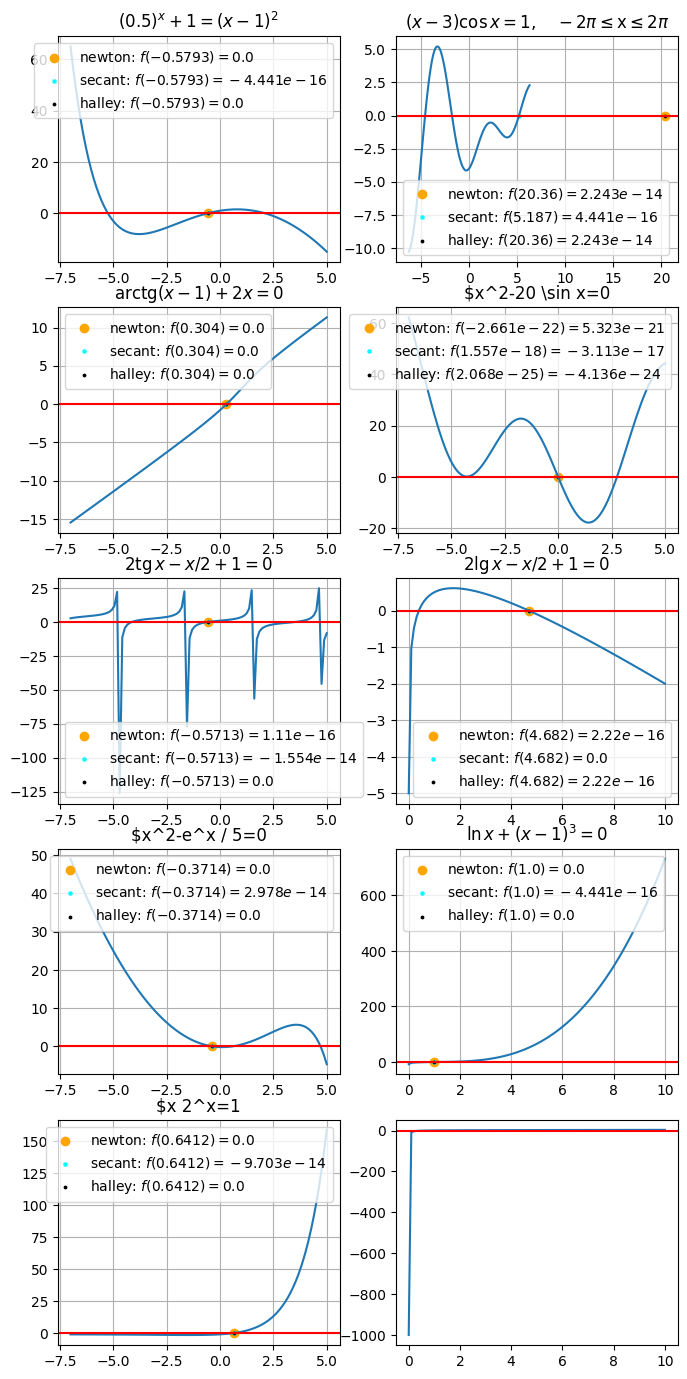

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import newton

w = 2
h = (len(methods) + w - 1) // w
fig, axs = plt.subplots(h, w, figsize=(8, 17))
x = np.linspace(-7, 5, 100)
xpos = np.linspace(1e-3, 10, 100)
for i, (f, p, s, n) in enumerate(methods):
    ax = axs[i // 2][i % 2]
    xx = x
    if 'cos' in n:
        xx = np.linspace(-2 * np.pi, np.pi * 2, 100)
    elif 'ln' in n or 'lg' in n or '^{0.5}' in n:
        xx = xpos
    ax.plot(xx, f(xx))
    ax.axhline(0, x[0], x[-1], color='red')
    z = newton(f, xx.mean(), p)
    ax.scatter(z, f(z), color='orange', label=rf'newton: $f({z:.4}) = {f(z):.4}$')
    z = newton(f, xx.mean())  # secant method
    ax.scatter(z, f(z), color='cyan', s=5, label=rf'secant: $f({z:.4}) = {f(z):.4}$')
    z = newton(f, xx.mean(), p, fprime2=s)  # halley method
    ax.scatter(z, f(z), color='black', s=3, label=rf'halley: $f({z:.4}) = {f(z):.4}$')
    ax.legend()
    ax.grid(True)
    ax.set_title(n)
plt.show()

### 5. Зри в корень дважды

Вычислить с точностью $\varepsilon=10^{-3}$ координаты точек пересечения кривых (любых двух на ваш выбор двумя разными методами):

a)
$$
\left\{\begin{array}{l}
\sin (x+1)-y=1.2 \\
2 x+\cos (y)=2
\end{array}\right.
$$
б)
$$
\left\{\begin{array}{l}
\tan (x y+0.4)=x^2 \\
0.6 x^2+2 y^2=1
\end{array}\right.
$$
B)
$$
\left\{\begin{array}{l}
\cos (x-1)+y=0.5 \\
x-\cos (y)=3
\end{array}\right.
$$
г)
$$
\left\{\begin{array}{l}
\sin (x+2)-y=1.5 \\
x+\cos (y-2)=0.5
\end{array}\right.
$$

In [2]:
import sympy as s

x, y = s.symbols('x y')
systems = (
    s.Matrix((s.sin(x + 1) - y - 1.2, 2 * x + s.cos(y) - 2)),
    s.Matrix((s.tan(x * y + 0.4) - x ** 2, 0.6 * x ** 2 + 2 * y ** 2 - 1)),
    s.Matrix((s.cos(x - 1) + y - 0.5, x - s.cos(y) - 3)),
    s.Matrix((s.sin(x + 2) - y - 1.5, x + s.cos(y - 1) - 0.5)),
)
jacs = (s.Matrix([[s.diff(f, a) for a in (x, y)] for f in vec]) for vec in systems)

In [ ]:
%matplotlib
%matplotlib widget
from scipy.optimize import minimize, root
from time import time
import matplotlib.pyplot as plt
import numpy as np

methods = [
#    'hybr', 'lm',
    'broyden1', 'broyden2', 'diagbroyden',
    'anderson', 'linearmixing', 'excitingmixing',
    'krylov', 'df-sane',
]


def by_min(u, v):
    def f(x, y):
        ux = u(x, y)
        vx = v(x, y)
    return minimize(f, np.zeros())[0]


#plt.ioff()
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout()
i = 0
for F, J in zip(systems, jacs):
    def f2(x):
        ux = F[0](x)
        vx = F[1](x)
        return ux * ux + vx * vx
    ax = axs[i // 2][i % 2]
    ax.set_title(str(F))
    x0 = minimize(f2, (0, 0))[0]
    print(x0)
    ax.plot(x0, label='by_min')
    performance = []
    for method in methods:
        tts = []
        eps = []
        prev = None
        def callback(x, f):
            eps.append(f)
            tts.append(time() - prev)
            prev = time()
        prev = time()
        x0 = root(F, jac=J, method=method, callback=callback)
        ax.plot(x0, label=method)
        performance.append((tts, eps))


### 6*. Оценка скорости сходимости метода Ньютона.
Покажите, что для функции $f(x)=|x|^{5 / 2}$ метод Ньютона сходится лишь экспонциально - т.е. невязка уменьшается пропорционально $e^{-n}$.

Покажите аналитически, что метод Ньютона в лучшем случае имеет квадратичную экспонциальную сходимость, т.е. ошибка убывает пропорционально $e^{-n^2}$.